# Movie Lens Dataset Exploration

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
users_df = pd.read_csv('./data/users.csv')
print(users_df.shape)
users_df.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
items_df = pd.read_csv('./data/items.csv')
print(items_df.shape)
items_df.head()

(1746, 27)


,movie_id,title,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,SciFi,Thriller,War,Western,year,overview,original_language,runtime,vote_average,vote_count
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,1995.0,"Led by Woody, Andy's toys live happily in his ...",en,81.0,7.9,10878.0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,1,0,0,1995.0,James Bond must unmask the mysterious head of ...,en,130.0,6.8,2037.0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,1,0,0,1995.0,It's Ted the Bellhop's first night on the job....,en,98.0,6.1,1251.0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,1995.0,Chili Palmer is a Miami mobster who gets sent ...,en,105.0,6.5,501.0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,1,0,0,1995.0,An agoraphobic psychologist and a female detec...,en,124.0,6.5,424.0


In [4]:
ratings_df = pd.read_csv('./data/ratings.csv')
print(ratings_df.shape)
ratings_df.head()

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
# combine data
df = pd.merge(ratings_df, items_df, on='movie_id')
print(df.shape)
df.head()

(102295, 30)


,user_id,movie_id,rating,unix_timestamp,title,genre_unknown,Action,Adventure,Animation,Children,...,SciFi,Thriller,War,Western,year,overview,original_language,runtime,vote_average,vote_count
0,196,242,3,881250949,Kolya (1996),0,0,0,0,0,...,0,0,0,0,1997.0,After a fictitious marriage with a Russian emi...,cs,105.0,7.6,66.0
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,...,0,1,0,0,1997.0,Three detectives in the corrupt and brutal L.A...,en,138.0,7.8,2385.0
2,22,377,1,878887116,Heavyweights (1994),0,0,0,0,1,...,0,0,0,0,1994.0,Camp Hope is a summer retreat for overweight b...,en,100.0,6.0,170.0
3,244,51,2,880606923,Legends of the Fall (1994),0,0,0,0,0,...,0,0,1,1,1994.0,An epic tale of three brothers and their fathe...,en,133.0,7.4,1172.0
4,166,346,1,886397596,Jackie Brown (1997),0,0,0,0,0,...,0,0,0,0,1997.0,Jackie Brown is a flight attendant who gets ca...,en,154.0,7.3,3216.0


In [6]:
# In some cases a user might have rated the same movie multiple times.
refined_dataset = df.groupby(by=['user_id','title'], as_index=False).agg({"rating":"mean"})
print(refined_dataset.shape)
refined_dataset.head()

(99693, 3)


,user_id,title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [7]:
# lets see the average rating for all these movies
df.groupby('title').agg({'rating':'mean'}).sort_values(by='rating', ascending=False).head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [8]:
# Lets see the count of each rating given by users
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)    788
Chasing Amy (1997)     758
Star Wars (1977)       583
Contact (1997)         509
Fargo (1996)           508
Name: rating, dtype: int64

In [9]:
# Averge rating 
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()
# Rating counts
ratings['rating_counts']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Text(0, 0.5, 'count of rating')

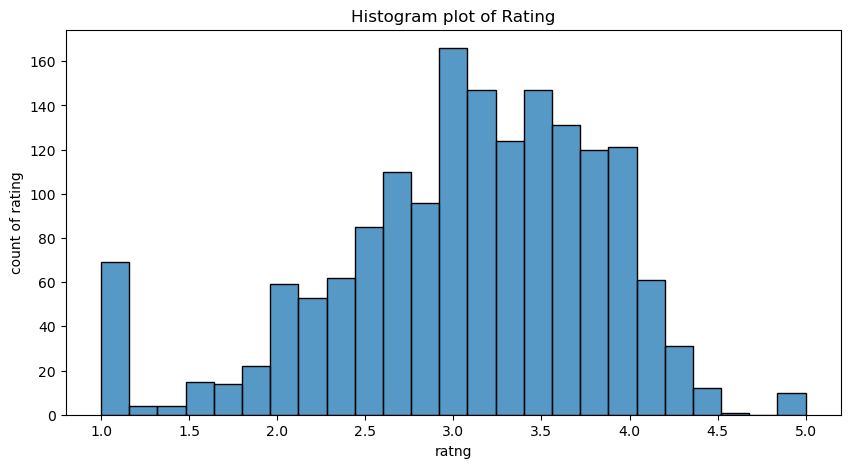

In [10]:
# Lets look at the rating 
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'])
plt.title("Histogram plot of Rating")
plt.xlabel('ratng')
plt.ylabel('count of rating')

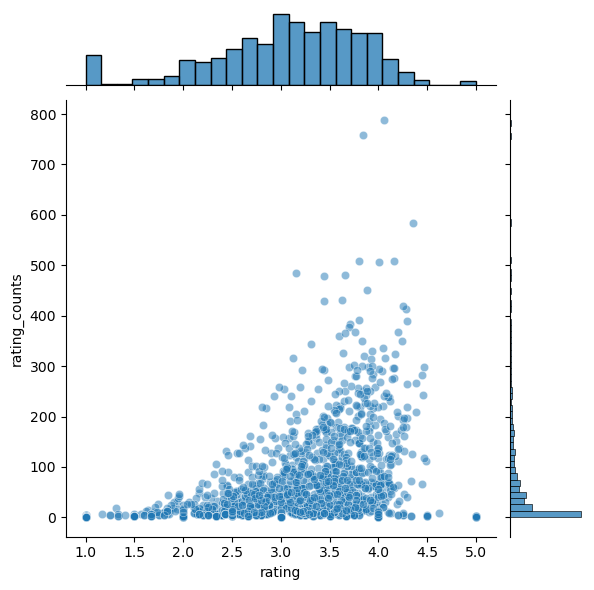

In [11]:
sns.jointplot(x='rating',y='rating_counts',data=ratings,alpha=0.5)

In [12]:
# get rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('title').size(), columns=['count'])
movies_count_df.head()

,count
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


Text(0, 0.5, 'number of ratings')

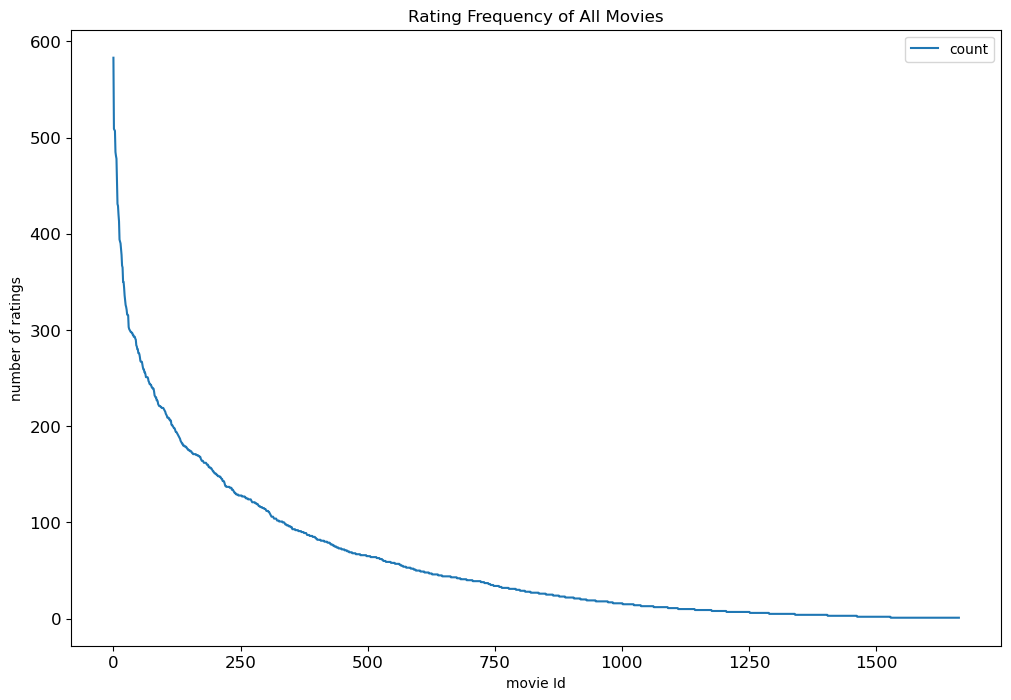

In [13]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")